# Cholera Descriptive Statistics and Ecological Regression Analysis

### Loading packages

In [1]:
# importing required packages

import pandas as pd                # for creating and handling dataframes
import numpy as np                 # for numerical and scientific computing tasks
import matplotlib.pyplot as plt    # for creating visualizations, data exploration, analysis and presentation
import matplotlib.patheffects as path_effects   # for adding effects to text in matplotlib plots
import seaborn as sns              # for creating informative and visually appealing statistical graphics
import geopandas as gpd            # for working with geospatial data
import pyproj                      # for geospatial transformations and projections
import geoplot as gplt             # for geospatial plotting
import geoplot.crs as gcrs         # for setting coordinate reference systems
import scipy.stats as stats        # for providing statistical analysis functions and distributions    
import statsmodels.api as sm       # for statistical modelling, hypothesis testing, and data exploration.

from sklearn.preprocessing import StandardScaler  # for Standardising features by removing mean and scaling

import warnings
warnings.filterwarnings('ignore')  # for suppressing warning messages


C:\Users\Chifuniro Baluwa\AppData\Local\Temp\ipykernel_1448\4161359360.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd                # for creating and handling dataframes


### Loading dataset

In [2]:
village_data_path = "C:/Users/Chifuniro Baluwa\Documents/LEEDS/SEM 2/Programming for GIA (GEOG5990M)/Dissertation/Data/unique_village_cases_final.csv"

village_df = pd.read_csv(village_data_path)

aggregated_cholera = gpd.read_file("C:/Users/Chifuniro Baluwa\Documents/LEEDS/SEM 2/Programming for GIA (GEOG5990M)/Dissertation/Data/cholera_bt_ta.shp")

bt_socioeconomic_variables = pd.read_csv("C:/Users/Chifuniro Baluwa/Documents/LEEDS/SEM 2/Programming for GIA (GEOG5990M)/Dissertation/Data/bt_ta_socioeconomic_variables1.csv")

# Cholera Descriptive Statistics

In [3]:
# Display the first few rows of the dataframes
print(village_df.head())

        village  cases
0         3WAYS     99
1      ANDERSON      4
2        ANDREW      1
3  ANGELOGOVEYA      1
4      ANYAMATA      4


In [4]:
# Total number of cases
total_cases = village_df['cases'].sum()
print(f"Total number of cases: {total_cases}")

Total number of cases: 7700


In [5]:
# Range of cases per village
min_cases = village_df['cases'].min()
max_cases = village_df['cases'].max()
print(f"Range of cases per village: {min_cases} - {max_cases}")

Range of cases per village: 1 - 436


In [6]:
# Villages with the highest and lowest case counts
most_cases_village = village_df.loc[village_df['cases'].idxmax()]
least_cases_village = village_df.loc[village_df['cases'].idxmin()]

print(f"Village with most cases: {most_cases_village['village']} ({most_cases_village['cases']} cases)")
print(f"Village with least cases: {least_cases_village['village']} ({least_cases_village['cases']} cases)")

Village with most cases: MBAYANI BANGWE (436 cases)
Village with least cases: ANDREW (1 cases)


### Data Visualization

#### Violin plot

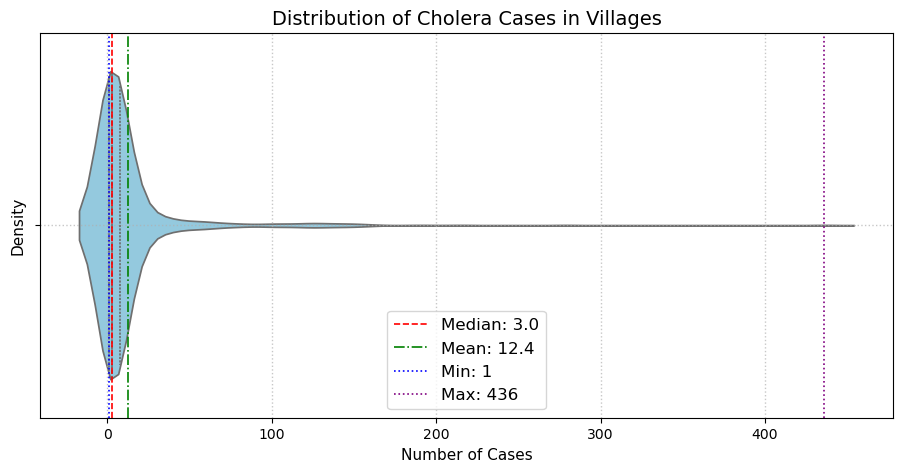

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the plot
plt.figure(figsize=(11, 5))



# Create a violin plot with sky blue color
sns.violinplot(x=village_df['cases'], color='skyblue', inner='quartile')

# Adding dotted gridlines with 70% transparency
plt.grid(True, which='both', linestyle=':', linewidth=1, alpha=0.7)

# Adding key annotations
median_cases = village_df['cases'].median()
mean_cases = village_df['cases'].mean()
min_cases = village_df['cases'].min()
max_cases = village_df['cases'].max()

# Annotate median
plt.axvline(median_cases, color='red', linestyle='--', linewidth=1.2, label=f'Median: {median_cases}')
# Annotate mean
plt.axvline(round(mean_cases, 1), color='green', linestyle='-.', linewidth=1.2, label=f'Mean: {round(mean_cases, 1)}')
# Annotate min and max
plt.axvline(min_cases, color='blue', linestyle=':', linewidth=1.2, label=f'Min: {min_cases}')
plt.axvline(max_cases, color='purple', linestyle=':', linewidth=1.2, label=f'Max: {max_cases}')

# Title and labels with increased font size
plt.title('Distribution of Cholera Cases in Villages', fontsize=14)
plt.xlabel('Number of Cases', fontsize=11)
plt.ylabel('Density', fontsize=11)

# Display the legend with increased font size
plt.legend(fontsize=12)

file_path = 'C:/Users/Chifuniro Baluwa/Documents/LEEDS/SEM 2/Programming for GIA (GEOG5990M)/Dissertation/Data/violin_plot.jpeg'  # Specify your desired file path and name
plt.savefig(file_path, dpi=300, bbox_inches='tight') 

# Show the plot
plt.show()


#### Bar plot

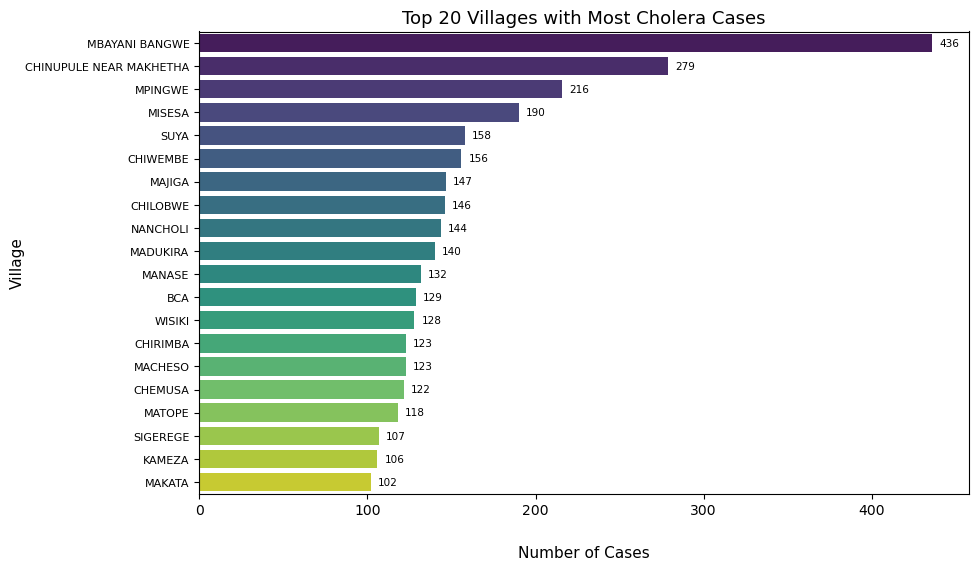

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(11, 6))

# Create the bar plot with viridis color palette
top_20_villages = village_df.nlargest(20, 'cases')
ax = sns.barplot(x='cases', y='village', data=top_20_villages, palette='viridis', dodge=False)

# Add data labels at the end of each bar, rounded to the nearest whole number
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(round(width))}', (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=7.5, color='black', xytext=(5, 0),
                textcoords='offset points')

# Remove inside grid lines
ax.grid(False)

# Increase the spacing between bars by adjusting the bar width
plt.subplots_adjust(left=0.2, right=0.9)

# Customize the appearance of the plot
plt.title('Top 20 Villages with Most Cholera Cases', fontsize=13)
#plt.xlabel('Number of Cases', fontsize=11)
#plt.ylabel('Village', fontsize=11)

plt.xlabel('Number of Cases', fontsize=11, labelpad=20)  # Increase offset
plt.ylabel('Village', fontsize=11, labelpad=0.1)          # Decrease offset

plt.yticks(fontsize=8)  # Reduce font size for village names

file_path = 'C:/Users/Chifuniro Baluwa/Documents/LEEDS/SEM 2/Programming for GIA (GEOG5990M)/Dissertation/Data/bar_plot.jpeg'  # Specify your desired file path and name
plt.savefig(file_path, dpi=300, bbox_inches='tight') 

# Show the plot
plt.show()


# Ecological Regression Analysis

## Data preprocessing

#### Getting to know the Blantyre district cholera incidence data and census socio-economic variables

### Cholera incidence data

In [9]:
aggregated_cholera.head()

,DIST_NAME,TA_CODE,TA_NAME,village,hlth_fc,age,sex,dt_f_ns,day,week,...,tretmnt,outcome,vcc_stt,vcc_dsg,dt_lst_,age_cat,age_2,hf_clst,urbn_rr,geometry
0,Blantyre,30503,TA Chigaru,GLORIA,LIGHTHOUSE,23.0,F,2023-02-20,20,8.0,...,"RINGERS LACTATE, ORS",ALIVE,UNVACCINATED,0.0,NaN,20-24,20-39,LIRANGWE CLUSTER,BT Rural,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
1,Blantyre,30503,TA Chigaru,NGWAYA,LIGHTHOUSE,34.0,M,2023-01-14,14,2.0,...,"RINGERS LACTATE, ORS",ALIVE,UNVACCINATED,0.0,NaN,30-34,20-39,LIRANGWE CLUSTER,BT Rural,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
2,Blantyre,30503,TA Chigaru,LIKONDE,LIRANGWE,36.0,M,2023-01-23,23,4.0,...,"RINGERS LACTATE, ORS",ALIVE,UNVACCINATED,0.0,NaN,35-39,20-39,LIRANGWE CLUSTER,BT Rural,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
3,Blantyre,30503,TA Chigaru,MIZANJE,LIRANGWE,2.0,M,2023-01-22,22,4.0,...,"RINGERS LACTATE, ORS",ALIVE,UNVACCINATED,0.0,NaN,0-4,0-19,LIRANGWE CLUSTER,BT Rural,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
4,Blantyre,30503,TA Chigaru,MIZANJE,LIRANGWE,13.0,F,2023-01-27,27,4.0,...,"RINGERS LACTATE, ORS",ALIVE,UNVACCINATED,0.0,NaN,10-14,0-19,LIRANGWE CLUSTER,BT Rural,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."


In [10]:
aggregated_cholera.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7606 entries, 0 to 7605
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   DIST_NAME  7606 non-null   object  
 1   TA_CODE    7606 non-null   object  
 2   TA_NAME    7606 non-null   object  
 3   village    7606 non-null   object  
 4   hlth_fc    7606 non-null   object  
 5   age        7606 non-null   float64 
 6   sex        7606 non-null   object  
 7   dt_f_ns    7606 non-null   object  
 8   day        7606 non-null   int64   
 9   week       7606 non-null   float64 
 10  month      7606 non-null   float64 
 11  year       7606 non-null   float64 
 12  date_hf    7605 non-null   object  
 13  dt_spcm    1086 non-null   object  
 14  rdt_rsl    7553 non-null   object  
 15  cltr_rs    7602 non-null   object  
 16  epi_lnk    7597 non-null   object  
 17  cs_stts    7606 non-null   object  
 18  tretmnt    7548 non-null   object  
 19  outcome    7532 non

In [11]:
aggregated_cholera.isnull().sum()

DIST_NAME       0
TA_CODE         0
TA_NAME         0
village         0
hlth_fc         0
age             0
sex             0
dt_f_ns         0
day             0
week            0
month           0
year            0
date_hf         1
dt_spcm      6520
rdt_rsl        53
cltr_rs         4
epi_lnk         9
cs_stts         0
tretmnt        58
outcome        74
vcc_stt        60
vcc_dsg       445
dt_lst_      7142
age_cat         0
age_2           0
hf_clst         0
urbn_rr         0
geometry        0
dtype: int64

In [12]:
# checking crs
print(aggregated_cholera.crs)

EPSG:4326


################################################################################################################################

### Socioeconomic variables

In [13]:
#socioeconomic_variables.head()
bt_socioeconomic_variables.head()

,Area Name,population,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,protected well,borehole,...,other water,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet
0,TA Kapeni,103742,486,82.0,4.5,10.9,8.6,4.0,2.5,66.6,...,0.3,4.2,0.3,15.7,39.8,29.9,4.1,4.0,2.0,4.0
1,TA Lundu,32271,245,72.5,0.1,3.8,1.8,1.8,1.0,86.6,...,0.1,0.2,0.0,5.5,58.0,28.5,0.8,5.7,1.3,5.1
2,TA Chigaru,51779,203,74.1,0.2,1.2,0.3,0.6,0.4,95.2,...,0,0.3,0.1,9.0,62.3,17.5,3.5,5.1,2.0,5.7
3,TA Kunthembwe,45972,100,63.3,0.5,0.3,0.4,6.1,0.5,78.4,...,0,0.7,0.1,2.2,33.5,41.9,2.8,15.3,3.5,5.7
4,TA Makata,20032,328,74.0,0.0,0.0,na,5.1,1.1,82.2,...,0.1,0.0,2.7,1.1,49.2,35.3,4.5,6.0,1.2,6.0


In [14]:
#socioeconomic_variables.info()
bt_socioeconomic_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Area Name                             31 non-null     object 
 1   population                            31 non-null     object 
 2   pop density                           31 non-null     object 
 3   literacy rate                         31 non-null     float64
 4   piped into dwelling                   31 non-null     float64
 5   piped into yard                       31 non-null     float64
 6   community standpipe                   31 non-null     object 
 7   unprotected well                      31 non-null     float64
 8   protected well                        31 non-null     float64
 9   borehole                              31 non-null     float64
 10  spring                                31 non-null     object 
 11  river                

In [15]:
#socioeconomic_variables.isnull().sum()
bt_socioeconomic_variables.isnull().sum()

Area Name                               0
population                              0
pop density                             0
literacy rate                           0
piped into dwelling                     0
piped into yard                         0
community standpipe                     0
unprotected well                        0
protected well                          0
borehole                                0
spring                                  0
river                                   0
lake                                    0
dam                                     0
other water                             0
flush toilet                            0
vip latrine                             0
pit latrine with concrete slab          0
pit latrine with earth/sand slab        0
pit latrine without slab or open pit    0
compost toilet                          0
other toilet use                        0
no facility/bush/field                  0
no toilet                         

In [16]:
#socioeconomic_variables.describe()
bt_socioeconomic_variables.describe()

,literacy rate,piped into dwelling,piped into yard,unprotected well,protected well,borehole,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,86.209677,15.900000,16.341935,3.364516,3.400000,27.022581,17.887097,1.919355,28.570968,31.906452,14.819355,1.525806,2.193548,1.174194,2.193548
std,8.129631,18.338266,10.601282,5.185271,5.334479,30.923192,24.557806,1.841814,18.881388,14.776895,9.987406,1.603739,3.700985,1.623980,3.700985
min,63.300000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.800000,0.300000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,82.400000,4.100000,5.500000,0.550000,0.450000,4.550000,2.500000,0.350000,8.450000,24.750000,9.400000,0.300000,0.100000,0.300000,0.100000
50%,88.900000,9.700000,17.200000,1.000000,1.100000,10.200000,10.400000,1.300000,31.500000,32.100000,12.100000,0.700000,0.400000,0.700000,0.400000
75%,91.000000,24.000000,23.600000,4.550000,2.800000,50.150000,20.950000,2.950000,43.500000,38.100000,20.200000,2.600000,3.050000,1.300000,3.050000
max,97.900000,77.800000,37.400000,21.700000,20.000000,95.200000,98.400000,6.000000,57.300000,62.300000,41.900000,6.100000,15.300000,8.700000,15.300000


## Data Cleaning, Data Exploratory and Data Manipulation

### aggregated_cholera

In [17]:
aggregated_cholera.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7606 entries, 0 to 7605
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   DIST_NAME  7606 non-null   object  
 1   TA_CODE    7606 non-null   object  
 2   TA_NAME    7606 non-null   object  
 3   village    7606 non-null   object  
 4   hlth_fc    7606 non-null   object  
 5   age        7606 non-null   float64 
 6   sex        7606 non-null   object  
 7   dt_f_ns    7606 non-null   object  
 8   day        7606 non-null   int64   
 9   week       7606 non-null   float64 
 10  month      7606 non-null   float64 
 11  year       7606 non-null   float64 
 12  date_hf    7605 non-null   object  
 13  dt_spcm    1086 non-null   object  
 14  rdt_rsl    7553 non-null   object  
 15  cltr_rs    7602 non-null   object  
 16  epi_lnk    7597 non-null   object  
 17  cs_stts    7606 non-null   object  
 18  tretmnt    7548 non-null   object  
 19  outcome    7532 non

In [18]:
# Dropping all columns except TA name and village. This is what i need for this analysis. 
# Each entry of the village represent a cholera incidence that was entered in a cholera linelist
# will use that to calculate cumulative cholera incidence at a TA level

aggregated_cholera.drop(columns =['DIST_NAME','TA_CODE','hlth_fc','age','sex','dt_f_ns','day','week','month','year',
                                 'date_hf','dt_spcm','rdt_rsl','cltr_rs','epi_lnk','cs_stts','tretmnt','outcome',
                                 'vcc_dsg','dt_lst_','age_cat','age_2','hf_clst','urbn_rr','vcc_stt'], inplace=True)

aggregated_cholera

,TA_NAME,village,geometry
0,TA Chigaru,GLORIA,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
1,TA Chigaru,NGWAYA,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
2,TA Chigaru,LIKONDE,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
3,TA Chigaru,MIZANJE,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
4,TA Chigaru,MIZANJE,"POLYGON ((34.97594 -15.35398, 34.97694 -15.354..."
...,...,...,...
7601,South Lunzu Ward,MANJOMBE,"POLYGON ((35.08560 -15.71327, 35.08554 -15.713..."
7602,South Lunzu Ward,MANJOMBE,"POLYGON ((35.08560 -15.71327, 35.08554 -15.713..."
7603,South Lunzu Ward,MANJOMBE,"POLYGON ((35.08560 -15.71327, 35.08554 -15.713..."
7604,South Lunzu Ward,MANJOMBE,"POLYGON ((35.08560 -15.71327, 35.08554 -15.713..."


In [19]:
# Creating a new data frame that will contain the calculated cumulative incidence rate for each TA over the study period 

# Group by 'TA_NAME' and aggregate: count villages and retain the first geometry
aggregated_cholera_summaries = aggregated_cholera.groupby('TA_NAME').agg({
    'village': 'count',
    'geometry': 'first'
}).reset_index()

# Rename the columns for clarity
aggregated_cholera_summaries.columns = ['TA_NAME', 'cholera incidence','geometry']

# Reorder the columns to have 'Geometry' as the first column
aggregated_cholera_summaries = aggregated_cholera_summaries[['geometry', 'TA_NAME', 'cholera incidence']]


# Display the result
aggregated_cholera_summaries


,geometry,TA_NAME,cholera incidence
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,215
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,203
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,377
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,3
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,221
5,"POLYGON ((34.99291 -15.74069, 34.99293 -15.740...",Chilomoni Ward,31
6,"POLYGON ((35.00606 -15.81928, 35.00716 -15.821...",Green Corner Ward,269
7,"POLYGON ((35.08070 -15.80093, 35.08090 -15.800...",Limbe Central Ward,40
8,"POLYGON ((35.11831 -15.72721, 35.11943 -15.728...",Mapanga Ward,111
9,"POLYGON ((34.99885 -15.75236, 34.99898 -15.752...",Mbayani Ward,17


################################################################################################################################

### Socioeconomic variables

In [20]:
# Changing na to 0
# Replace NaN with 0
bt_socioeconomic_variables.replace('na', np.nan, inplace=True)  # Convert 'NA' strings to NaN
bt_socioeconomic_variables.replace('', np.nan, inplace=True)    # Convert empty strings to NaN

# Now, replace all NaNs with 0
bt_socioeconomic_variables.fillna(0, inplace=True)

bt_socioeconomic_variables.head()

,Area Name,population,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,protected well,borehole,...,other water,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet
0,TA Kapeni,103742,486,82.0,4.5,10.9,8.6,4.0,2.5,66.6,...,0.3,4.2,0.3,15.7,39.8,29.9,4.1,4.0,2.0,4.0
1,TA Lundu,32271,245,72.5,0.1,3.8,1.8,1.8,1.0,86.6,...,0.1,0.2,0.0,5.5,58.0,28.5,0.8,5.7,1.3,5.1
2,TA Chigaru,51779,203,74.1,0.2,1.2,0.3,0.6,0.4,95.2,...,0,0.3,0.1,9.0,62.3,17.5,3.5,5.1,2.0,5.7
3,TA Kunthembwe,45972,100,63.3,0.5,0.3,0.4,6.1,0.5,78.4,...,0,0.7,0.1,2.2,33.5,41.9,2.8,15.3,3.5,5.7
4,TA Makata,20032,328,74.0,0.0,0.0,0,5.1,1.1,82.2,...,0.1,0.0,2.7,1.1,49.2,35.3,4.5,6.0,1.2,6.0


### Joining a non spatial (Blantyre socio-economic variables) dataset to a spatial (Blantyre TA and cholera incidence) shapefile

In [21]:
cholera_socioeconomic = pd.merge(aggregated_cholera_summaries, bt_socioeconomic_variables,  left_on='TA_NAME', right_on='Area Name', how='left')

cholera_socioeconomic.head()

,geometry,TA_NAME,cholera incidence,Area Name,population,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,...,other water,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,215,Bangwe Mthandizi Ward,"19,942","5,085",89.4,15.4,16.1,58.7,...,0.7,17.9,3.6,40.8,25.4,10.8,0.3,0.7,0.5,0.7
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,203,Bangwe Ward,"18,815","14,236",87.3,4.1,23.9,65.2,...,0.9,4.0,4.4,55.9,29.8,4.6,0.3,0.6,0.4,0.6
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,377,Blantyre City Centre Ward,"21,179","1,945",91.0,31.9,23.3,30.8,...,1,40.9,0.5,13.9,33.6,8.9,1.6,0.3,0.2,0.3
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,3,Blantyre South Ward,"26,317","4,180",92.2,25.9,25.9,41.4,...,1.1,24.7,1.1,31.5,27.3,13.2,1.8,0.1,0.3,0.1
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,221,Chigumula Ward,"24,869","1,192",84.8,6.2,4.9,23.6,...,0.4,8.8,2.2,20.1,46.8,19.2,0.1,2.1,0.7,2.1


In [22]:
# Dropping one column of TA names
cholera_socioeconomic.drop(columns =['Area Name'], inplace=True)

cholera_socioeconomic.head()

,geometry,TA_NAME,cholera incidence,population,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,...,other water,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,215,"19,942","5,085",89.4,15.4,16.1,58.7,1.0,...,0.7,17.9,3.6,40.8,25.4,10.8,0.3,0.7,0.5,0.7
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,203,"18,815","14,236",87.3,4.1,23.9,65.2,1.3,...,0.9,4.0,4.4,55.9,29.8,4.6,0.3,0.6,0.4,0.6
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,377,"21,179","1,945",91.0,31.9,23.3,30.8,0.7,...,1,40.9,0.5,13.9,33.6,8.9,1.6,0.3,0.2,0.3
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,3,"26,317","4,180",92.2,25.9,25.9,41.4,0.6,...,1.1,24.7,1.1,31.5,27.3,13.2,1.8,0.1,0.3,0.1
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,221,"24,869","1,192",84.8,6.2,4.9,23.6,21.7,...,0.4,8.8,2.2,20.1,46.8,19.2,0.1,2.1,0.7,2.1


In [23]:
cholera_socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   geometry                              31 non-null     geometry
 1   TA_NAME                               31 non-null     object  
 2   cholera incidence                     31 non-null     int64   
 3   population                            31 non-null     object  
 4   pop density                           31 non-null     object  
 5   literacy rate                         31 non-null     float64 
 6   piped into dwelling                   31 non-null     float64 
 7   piped into yard                       31 non-null     float64 
 8   community standpipe                   31 non-null     object  
 9   unprotected well                      31 non-null     float64 
 10  protected well                        31 non-null     float64 
 11  borehole

In [24]:
# Removing commas and converting with error handling
cholera_socioeconomic['population'] = pd.to_numeric(cholera_socioeconomic['population'].str.replace(',', ''), errors='coerce')
cholera_socioeconomic['pop density'] = pd.to_numeric(cholera_socioeconomic['pop density'].str.replace(',', ''), errors='coerce')
cholera_socioeconomic['community standpipe'] = pd.to_numeric(cholera_socioeconomic['community standpipe'].str.replace(',', ''), errors='coerce')

cholera_socioeconomic['spring'] = pd.to_numeric(cholera_socioeconomic['spring'].str.replace(',', ''), errors='coerce')

cholera_socioeconomic['river'] = pd.to_numeric(cholera_socioeconomic['river'].str.replace(',', ''), errors='coerce')
cholera_socioeconomic['lake'] = pd.to_numeric(cholera_socioeconomic['lake'].str.replace(',', ''), errors='coerce')
cholera_socioeconomic['dam'] = pd.to_numeric(cholera_socioeconomic['dam'].str.replace(',', ''), errors='coerce')
cholera_socioeconomic['other water'] = pd.to_numeric(cholera_socioeconomic['other water'].str.replace(',', ''), errors='coerce')

cholera_socioeconomic.head()


,geometry,TA_NAME,cholera incidence,population,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,...,other water,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,215,19942,5085,89.4,15.4,16.1,58.7,1.0,...,0.7,17.9,3.6,40.8,25.4,10.8,0.3,0.7,0.5,0.7
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,203,18815,14236,87.3,4.1,23.9,65.2,1.3,...,0.9,4.0,4.4,55.9,29.8,4.6,0.3,0.6,0.4,0.6
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,377,21179,1945,91.0,31.9,23.3,30.8,0.7,...,1.0,40.9,0.5,13.9,33.6,8.9,1.6,0.3,0.2,0.3
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,3,26317,4180,92.2,25.9,25.9,41.4,0.6,...,1.1,24.7,1.1,31.5,27.3,13.2,1.8,0.1,0.3,0.1
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,221,24869,1192,84.8,6.2,4.9,23.6,21.7,...,0.4,8.8,2.2,20.1,46.8,19.2,0.1,2.1,0.7,2.1


In [25]:
cholera_socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   geometry                              31 non-null     geometry
 1   TA_NAME                               31 non-null     object  
 2   cholera incidence                     31 non-null     int64   
 3   population                            31 non-null     int64   
 4   pop density                           31 non-null     int64   
 5   literacy rate                         31 non-null     float64 
 6   piped into dwelling                   31 non-null     float64 
 7   piped into yard                       31 non-null     float64 
 8   community standpipe                   30 non-null     float64 
 9   unprotected well                      31 non-null     float64 
 10  protected well                        31 non-null     float64 
 11  borehole

In [26]:
# Converting cholera incidence into percentages
cholera_socioeconomic['cholera rate'] = (cholera_socioeconomic['cholera incidence'] / cholera_socioeconomic['population']) * 100

cholera_socioeconomic.head()

,geometry,TA_NAME,cholera incidence,population,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,...,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet,cholera rate
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,215,19942,5085,89.4,15.4,16.1,58.7,1.0,...,17.9,3.6,40.8,25.4,10.8,0.3,0.7,0.5,0.7,1.078127
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,203,18815,14236,87.3,4.1,23.9,65.2,1.3,...,4.0,4.4,55.9,29.8,4.6,0.3,0.6,0.4,0.6,1.078926
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,377,21179,1945,91.0,31.9,23.3,30.8,0.7,...,40.9,0.5,13.9,33.6,8.9,1.6,0.3,0.2,0.3,1.780065
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,3,26317,4180,92.2,25.9,25.9,41.4,0.6,...,24.7,1.1,31.5,27.3,13.2,1.8,0.1,0.3,0.1,0.011399
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,221,24869,1192,84.8,6.2,4.9,23.6,21.7,...,8.8,2.2,20.1,46.8,19.2,0.1,2.1,0.7,2.1,0.888657


In [27]:
 #Dropping the columns of raw socio-economic variables as they will not be used in subsequence analysis

cholera_socioeconomic.drop(columns =['cholera incidence'],
                     inplace=True)# Dropping columns

cholera_socioeconomic.head()

,geometry,TA_NAME,population,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,protected well,...,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet,cholera rate
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,19942,5085,89.4,15.4,16.1,58.7,1.0,2.0,...,17.9,3.6,40.8,25.4,10.8,0.3,0.7,0.5,0.7,1.078127
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,18815,14236,87.3,4.1,23.9,65.2,1.3,3.1,...,4.0,4.4,55.9,29.8,4.6,0.3,0.6,0.4,0.6,1.078926
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,21179,1945,91.0,31.9,23.3,30.8,0.7,2.0,...,40.9,0.5,13.9,33.6,8.9,1.6,0.3,0.2,0.3,1.780065
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,26317,4180,92.2,25.9,25.9,41.4,0.6,1.1,...,24.7,1.1,31.5,27.3,13.2,1.8,0.1,0.3,0.1,0.011399
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,24869,1192,84.8,6.2,4.9,23.6,21.7,17.6,...,8.8,2.2,20.1,46.8,19.2,0.1,2.1,0.7,2.1,0.888657


In [28]:
cholera_socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   geometry                              31 non-null     geometry
 1   TA_NAME                               31 non-null     object  
 2   population                            31 non-null     int64   
 3   pop density                           31 non-null     int64   
 4   literacy rate                         31 non-null     float64 
 5   piped into dwelling                   31 non-null     float64 
 6   piped into yard                       31 non-null     float64 
 7   community standpipe                   30 non-null     float64 
 8   unprotected well                      31 non-null     float64 
 9   protected well                        31 non-null     float64 
 10  borehole                              31 non-null     float64 
 11  spring  

In [29]:
# Reodering columns 
column = ['geometry','TA_NAME','population','cholera rate','pop density','literacy rate','piped into dwelling',
          'piped into yard','community standpipe','unprotected well','protected well','borehole','spring','river','lake',
          'dam','other water','flush toilet','vip latrine','pit latrine with concrete slab','pit latrine with earth/sand slab',
          'pit latrine without slab or open pit','compost toilet','other toilet use','no facility/bush/field','no toilet']

# Reindex the DataFrame with the new column order
cholera_socioeconomic = cholera_socioeconomic[column]

cholera_socioeconomic.head()

,geometry,TA_NAME,population,cholera rate,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,...,other water,flush toilet,vip latrine,pit latrine with concrete slab,pit latrine with earth/sand slab,pit latrine without slab or open pit,compost toilet,other toilet use,no facility/bush/field,no toilet
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,19942,1.078127,5085,89.4,15.4,16.1,58.7,1.0,...,0.7,17.9,3.6,40.8,25.4,10.8,0.3,0.7,0.5,0.7
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,18815,1.078926,14236,87.3,4.1,23.9,65.2,1.3,...,0.9,4.0,4.4,55.9,29.8,4.6,0.3,0.6,0.4,0.6
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,21179,1.780065,1945,91.0,31.9,23.3,30.8,0.7,...,1.0,40.9,0.5,13.9,33.6,8.9,1.6,0.3,0.2,0.3
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,26317,0.011399,4180,92.2,25.9,25.9,41.4,0.6,...,1.1,24.7,1.1,31.5,27.3,13.2,1.8,0.1,0.3,0.1
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,24869,0.888657,1192,84.8,6.2,4.9,23.6,21.7,...,0.4,8.8,2.2,20.1,46.8,19.2,0.1,2.1,0.7,2.1


In [30]:
cholera_socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   geometry                              31 non-null     geometry
 1   TA_NAME                               31 non-null     object  
 2   population                            31 non-null     int64   
 3   cholera rate                          31 non-null     float64 
 4   pop density                           31 non-null     int64   
 5   literacy rate                         31 non-null     float64 
 6   piped into dwelling                   31 non-null     float64 
 7   piped into yard                       31 non-null     float64 
 8   community standpipe                   30 non-null     float64 
 9   unprotected well                      31 non-null     float64 
 10  protected well                        31 non-null     float64 
 11  borehole

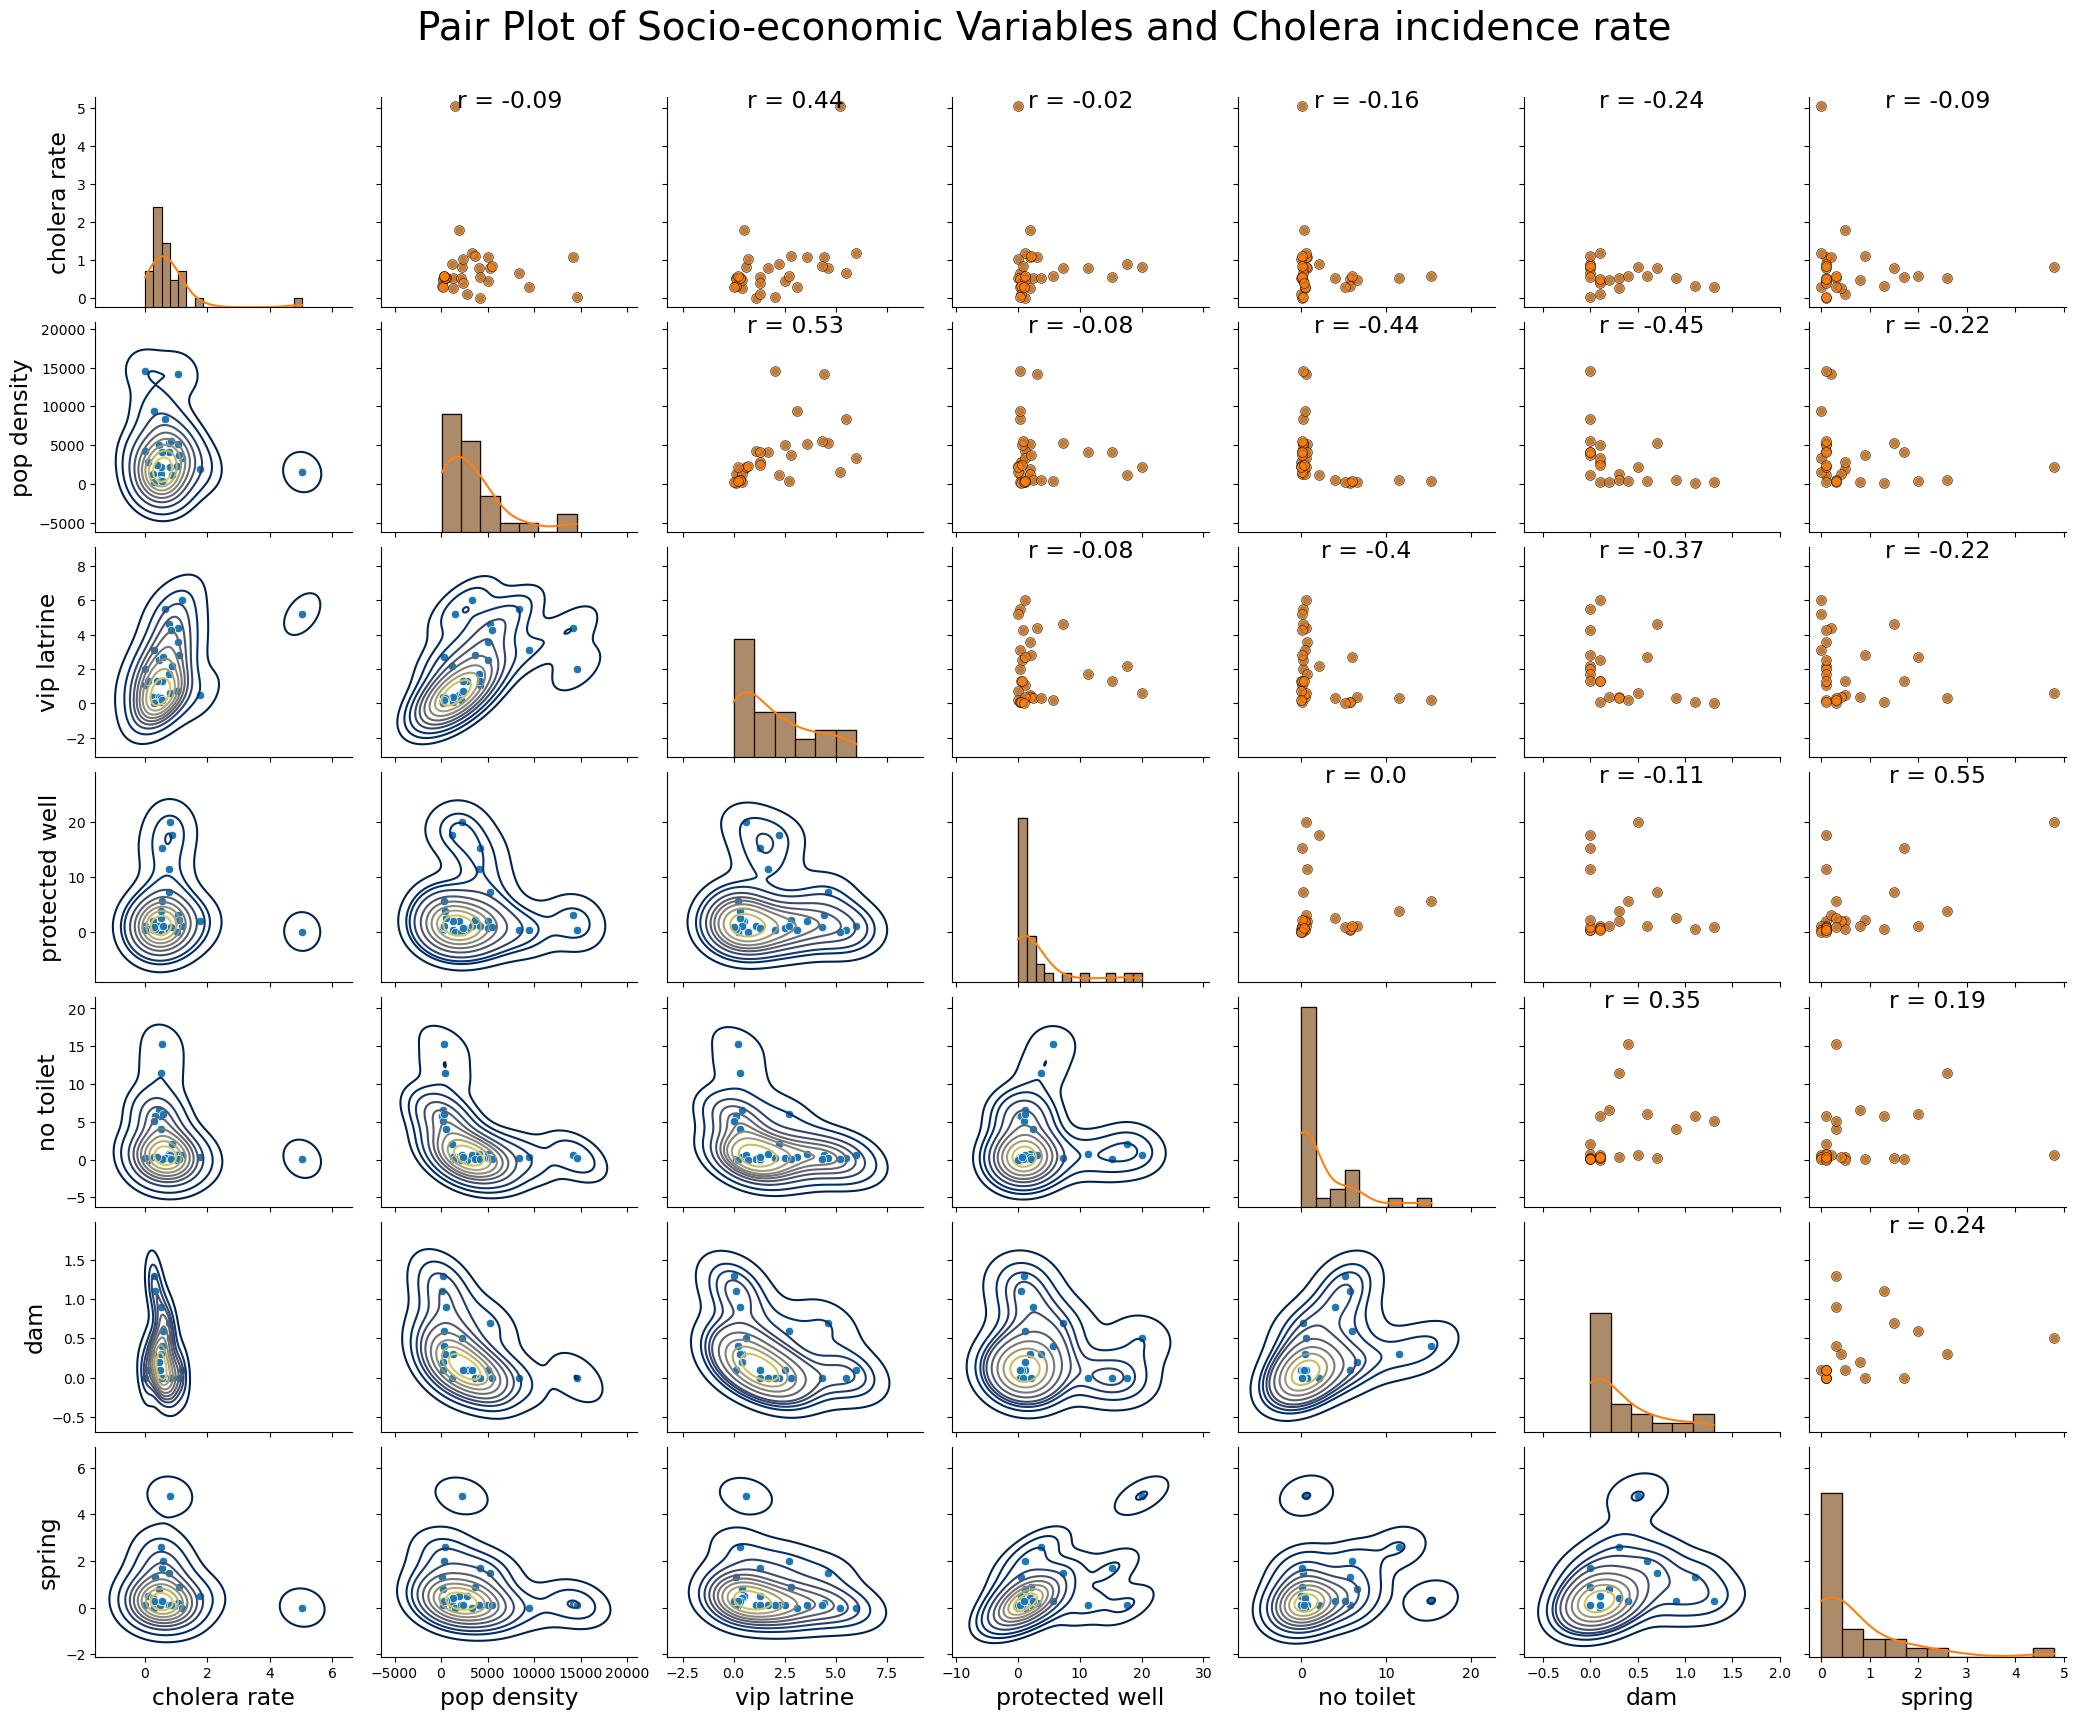

In [31]:
# Plotting pairwise scatter to explore relationships between standardized variables and the deprivation index


selected_variables = ['cholera rate','pop density','vip latrine','protected well','no toilet','dam','spring']
                      
                      #'pop density', 'protected well', 'community standpipe', 'vip latrine']

# Customizing the color palette and figure size for better visualization
pairplot = sns.pairplot(cholera_socioeconomic[selected_variables],
                       palette='colorblind',  # Using a colorblind-friendly palette
                       height=2.5, aspect=1.2)  # Adjusting height and aspect ratio for better readability

# Mapping density plots to the lower triangle (off-diagonal plots)
pairplot.map_lower(sns.kdeplot, cmap="cividis")  # Using KDE plot with cividis, a colour-blind colormap


# Customizing diagonal plots (histograms or KDE plots) for better visualization
pairplot.map_diag(sns.histplot, kde=True, linewidth=0.5, edgecolor='k')  # Adding KDE lines and border

# Mapping scatter plots to the upper triangle (off-diagonal plots)
pairplot.map_upper(sns.scatterplot, s=50, edgecolors='k', linewidths=0.5, alpha=0.7)

# Adding correlation coefficients above the scatterplots
def annotate_corr(x, y, **kwargs):       # Define function with x, y, and kwargs.
     r = round(x.corr(y), 2)             # Calculate and round correlation coefficient, r.
     ax = plt.gca()                      # Get current Axes instance for annotation.
     ax.annotate(f"r = {r}", xy=(0.5, 0.95), xycoords=ax.transAxes, ha='center', fontsize=17)   # Annotate Axes with correlation.

pairplot.map_upper(annotate_corr)

# Accessing the underlying axes objects
ax = pairplot.axes.flat  # This flattens the multi-dimensional array of axes into a single list

# Increase font size and set labels for x and y axes
for a in ax:
    a.xaxis.label.set_fontsize(17)  # Adjusting font size for x-axis labels
    a.yaxis.label.set_fontsize(17)  # Adjusting font size for y-axis labels

# Adjusting top margin for title
plt.subplots_adjust(top=0.93)  # Adjusting the top margin to make space for the title

# Plotting title of the plot and adjusting fontsize
plt.suptitle("Pair Plot of Socio-economic Variables and Cholera incidence rate", fontsize=28) 


# Saving the pairplot to a file
file_path = 'C:/Users/Chifuniro Baluwa/Documents/LEEDS/SEM 2/Programming for GIA (GEOG5990M)/Dissertation/Data/Pairwisescatter_plot.jpeg'  # Specifying desired file path and name
plt.savefig(file_path, dpi=300, bbox_inches='tight')  # Save the figure with a high dpi and tight bounding box


# Displaying the pairplot
plt.show()


In [32]:
# Calculating Spearman's rank correlation to check how variables correlate to each other

cholera_socioeconomic_corr = cholera_socioeconomic[['cholera rate','pop density','vip latrine','protected well','no toilet','dam','spring']].corr(method = 'spearman') # Calculating Spearman's correlation

cholera_socioeconomic_corr   # checking the executed Spearman correlation

,cholera rate,pop density,vip latrine,protected well,no toilet,dam,spring
cholera rate,1.000000,0.128629,0.478353,0.265913,-0.073812,-0.275970,-0.023276
pop density,0.128629,1.000000,0.728631,-0.047484,-0.548727,-0.644315,-0.335676
vip latrine,0.478353,0.728631,1.000000,0.035703,-0.287762,-0.540307,-0.347835
protected well,0.265913,-0.047484,0.035703,1.000000,0.422622,0.101235,0.497100
no toilet,-0.073812,-0.548727,-0.287762,0.422622,1.000000,0.560830,0.245507
dam,-0.275970,-0.644315,-0.540307,0.101235,0.560830,1.000000,0.459515
spring,-0.023276,-0.335676,-0.347835,0.497100,0.245507,0.459515,1.000000


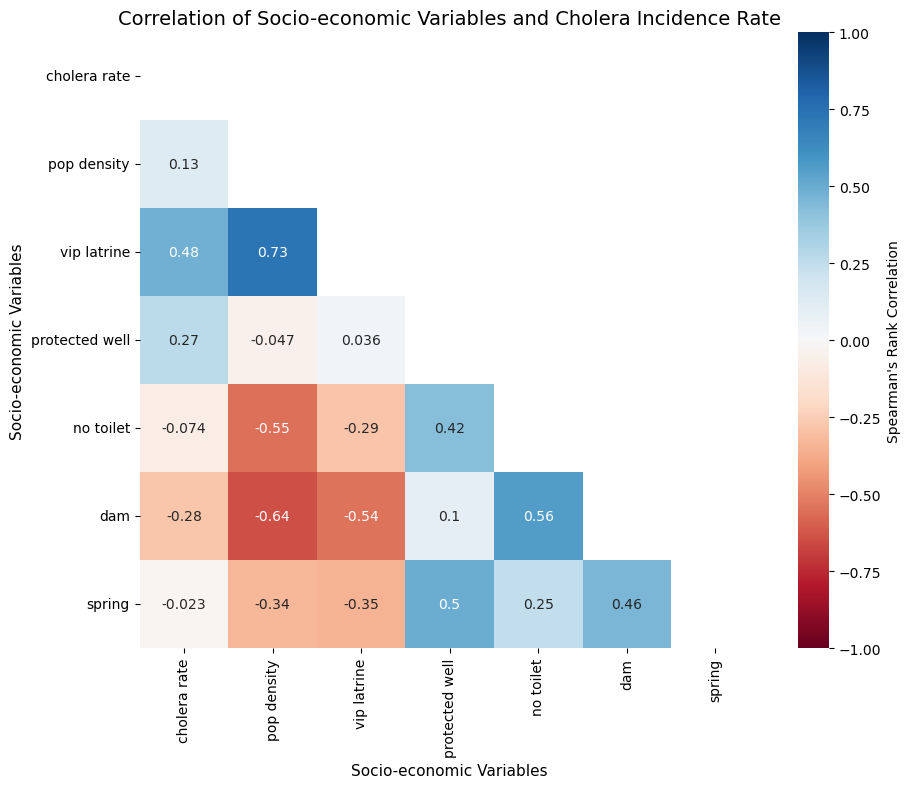

In [33]:
###### Visualising the Spearman's rank correlation of socio-economic variables

fig, ax = plt.subplots(figsize=(10, 8))   # Defining plot size

upper_triangle_mask = np.triu(np.ones_like(cholera_socioeconomic_corr))  # Defining mask to apply to upper right-hand corner of the plot

# Plotting a heatmap of the correlation dataframe
sns.heatmap(cholera_socioeconomic_corr, 
            annot=True,   # Annotating with Spearman's rank correlation values
            cmap='RdBu',  # Defining color map cividis
            vmin=-1,  # Defining minimum color on color bar
            vmax=1,  # Defining maximum color on color bar
            mask=upper_triangle_mask,  # Apply mask to upper triangle
            cbar_kws={'label': "Spearman's Rank Correlation"},  # Labelling for color bar
            ax=ax)  # Plotting on the defined axis

ax.set_xlabel("Socio-economic Variables", fontsize=11) # Setting axis labels x with font size 11
ax.set_ylabel("Socio-economic Variables", fontsize=11) # Setting axis labels y with font size 11

ax.set_title('Correlation of Socio-economic Variables and Cholera Incidence Rate', fontsize=14)  # Setting title with font size of 14

# Rotate the x-axis labels to vertical
plt.xticks(rotation=90)
plt.yticks(rotation=0)
file_path = 'C:/Users/Chifuniro Baluwa/Documents/LEEDS/SEM 2/Programming for GIA (GEOG5990M)/Dissertation/Data/correlation_matrix_plot.jpeg'  # Specify your desired file path and name
plt.savefig(file_path, dpi=300, bbox_inches='tight')  # Save the figure with a high dpi and tight bounding box

plt.show() # Displaying the plot


### Standardising socioeconomic variables

In [34]:
cholera_socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   geometry                              31 non-null     geometry
 1   TA_NAME                               31 non-null     object  
 2   population                            31 non-null     int64   
 3   cholera rate                          31 non-null     float64 
 4   pop density                           31 non-null     int64   
 5   literacy rate                         31 non-null     float64 
 6   piped into dwelling                   31 non-null     float64 
 7   piped into yard                       31 non-null     float64 
 8   community standpipe                   30 non-null     float64 
 9   unprotected well                      31 non-null     float64 
 10  protected well                        31 non-null     float64 
 11  borehole

In [35]:
# Standardize the socio-economic variables - to make the variables be on the same comparable scale

# Assuming 'cholera_socioeconomic' is a DataFrame already defined
variables = cholera_socioeconomic[['pop density','vip latrine','protected well','no toilet','dam','spring']]

scaler = StandardScaler()   # Initialising StandardScaler object
standardized_variables = scaler.fit_transform(variables) # Standardizing the socio-economic variables

# Creating a DataFrame for standardized variables
standardized_df = pd.DataFrame(standardized_variables, columns=variables.columns, index=variables.index)

# Adding a prefix to the standardized variables
standardized_df = standardized_df.add_prefix('std_')

# Concatenating standardized variables with the original dataframe
cholera_socioeconomic = pd.concat([cholera_socioeconomic, standardized_df], axis=1)


cholera_socioeconomic.head() # checking if standardisation has been achieved and variables added to the original dataframe of leed variables

,geometry,TA_NAME,population,cholera rate,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,...,compost toilet,other toilet use,no facility/bush/field,no toilet,std_pop density,std_vip latrine,std_protected well,std_no toilet,std_dam,std_spring
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,19942,1.078127,5085,89.4,15.4,16.1,58.7,1.0,...,0.3,0.7,0.5,0.7,0.430569,0.927578,-0.266782,-0.410225,NaN,-0.561272
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,18815,1.078926,14236,87.3,4.1,23.9,65.2,1.3,...,0.3,0.6,0.4,0.6,2.915550,1.369112,-0.057168,-0.437692,NaN,-0.464857
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,21179,1.780065,1945,91.0,31.9,23.3,30.8,0.7,...,1.6,0.3,0.2,0.3,-0.422107,-0.783367,-0.266782,-0.520091,NaN,-0.175613
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,26317,0.011399,4180,92.2,25.9,25.9,41.4,0.6,...,1.8,0.1,0.3,0.1,0.184814,-0.452217,-0.438284,-0.575024,NaN,-0.561272
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,24869,0.888657,1192,84.8,6.2,4.9,23.6,21.7,...,0.1,2.1,0.7,2.1,-0.626586,0.154893,2.705930,-0.025694,-0.818387,-0.561272


In [36]:
# Changing na to 0
# Replace NaN with 0
cholera_socioeconomic.replace('na', np.nan, inplace=True)  # Convert 'NA' strings to NaN
cholera_socioeconomic.replace('', np.nan, inplace=True)    # Convert empty strings to NaN

# Now, replace all NaNs with 0
cholera_socioeconomic.fillna(0, inplace=True)

cholera_socioeconomic.head()

,geometry,TA_NAME,population,cholera rate,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,...,compost toilet,other toilet use,no facility/bush/field,no toilet,std_pop density,std_vip latrine,std_protected well,std_no toilet,std_dam,std_spring
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,19942,1.078127,5085,89.4,15.4,16.1,58.7,1.0,...,0.3,0.7,0.5,0.7,0.430569,0.927578,-0.266782,-0.410225,0.000000,-0.561272
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,18815,1.078926,14236,87.3,4.1,23.9,65.2,1.3,...,0.3,0.6,0.4,0.6,2.915550,1.369112,-0.057168,-0.437692,0.000000,-0.464857
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,21179,1.780065,1945,91.0,31.9,23.3,30.8,0.7,...,1.6,0.3,0.2,0.3,-0.422107,-0.783367,-0.266782,-0.520091,0.000000,-0.175613
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,26317,0.011399,4180,92.2,25.9,25.9,41.4,0.6,...,1.8,0.1,0.3,0.1,0.184814,-0.452217,-0.438284,-0.575024,0.000000,-0.561272
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,24869,0.888657,1192,84.8,6.2,4.9,23.6,21.7,...,0.1,2.1,0.7,2.1,-0.626586,0.154893,2.705930,-0.025694,-0.818387,-0.561272


In [37]:
cholera_socioeconomic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   geometry                              31 non-null     geometry
 1   TA_NAME                               31 non-null     object  
 2   population                            31 non-null     int64   
 3   cholera rate                          31 non-null     float64 
 4   pop density                           31 non-null     int64   
 5   literacy rate                         31 non-null     float64 
 6   piped into dwelling                   31 non-null     float64 
 7   piped into yard                       31 non-null     float64 
 8   community standpipe                   31 non-null     float64 
 9   unprotected well                      31 non-null     float64 
 10  protected well                        31 non-null     float64 
 11  borehole

In [38]:
#### Creating new variables of "Risk_index"

# Creating a column called "Risk index" calculated from standardised socio-economic variables
cholera_socioeconomic['Risk_index'] = cholera_socioeconomic['std_pop density'] + cholera_socioeconomic['std_vip latrine'] + cholera_socioeconomic['std_protected well'] + cholera_socioeconomic['std_no toilet'] + cholera_socioeconomic['std_dam'] + cholera_socioeconomic['std_spring']

cholera_socioeconomic['Risk_index'] = cholera_socioeconomic['Risk_index'].round(2)  # Rounding Risk index values to 2 decimal places

cholera_socioeconomic.head()   # Checking if the operations have been executed



,geometry,TA_NAME,population,cholera rate,pop density,literacy rate,piped into dwelling,piped into yard,community standpipe,unprotected well,...,other toilet use,no facility/bush/field,no toilet,std_pop density,std_vip latrine,std_protected well,std_no toilet,std_dam,std_spring,Risk_index
0,"POLYGON ((35.07204 -15.81228, 35.07411 -15.813...",Bangwe Mthandizi Ward,19942,1.078127,5085,89.4,15.4,16.1,58.7,1.0,...,0.7,0.5,0.7,0.430569,0.927578,-0.266782,-0.410225,0.000000,-0.561272,0.12
1,"POLYGON ((35.09406 -15.83133, 35.09427 -15.831...",Bangwe Ward,18815,1.078926,14236,87.3,4.1,23.9,65.2,1.3,...,0.6,0.4,0.6,2.915550,1.369112,-0.057168,-0.437692,0.000000,-0.464857,3.32
2,"POLYGON ((34.98987 -15.77018, 34.99013 -15.770...",Blantyre City Centre Ward,21179,1.780065,1945,91.0,31.9,23.3,30.8,0.7,...,0.3,0.2,0.3,-0.422107,-0.783367,-0.266782,-0.520091,0.000000,-0.175613,-2.17
3,"POLYGON ((35.00231 -15.79136, 35.00344 -15.792...",Blantyre South Ward,26317,0.011399,4180,92.2,25.9,25.9,41.4,0.6,...,0.1,0.3,0.1,0.184814,-0.452217,-0.438284,-0.575024,0.000000,-0.561272,-1.84
4,"POLYGON ((35.06366 -15.84802, 35.06412 -15.848...",Chigumula Ward,24869,0.888657,1192,84.8,6.2,4.9,23.6,21.7,...,2.1,0.7,2.1,-0.626586,0.154893,2.705930,-0.025694,-0.818387,-0.561272,0.83


In [39]:

from shapely.geometry import shape

# Convert the 'geometry' column to Shapely polygons using shape()
cholera_socioeconomic['geometry'] = cholera_socioeconomic['geometry'].apply(shape)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(cholera_socioeconomic, geometry='geometry')

gdf.crs = 'EPSG:4326'   #WGS84
#gdf.to_file('Cholera_risk_map.shp')


# Modelling

## Linear Regression (OLS)

In [40]:
# Rename the columns in the cholera_socioeconomic DataFrame
cholera_socioeconomic = cholera_socioeconomic.rename(columns={
    'std_pop density': 'Population density',
    'std_vip latrine': 'Ventilated improved pit latrine',
    'std_protected well': 'Protected well',
    'std_no toilet': 'No toilet',
    'std_dam': 'Dam',
    'std_spring': 'Spring'
})


# Select the independent variables and dependent variable
X = cholera_socioeconomic[['Population density','Ventilated improved pit latrine','Protected well','No toilet','Dam','Spring']]
y = cholera_socioeconomic['cholera rate']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           cholera rate   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     2.133
Date:                Wed, 14 Aug 2024   Prob (F-statistic):             0.0865
Time:                        09:45:04   Log-Likelihood:                -32.830
No. Observations:                  31   AIC:                             79.66
Df Residuals:                      24   BIC:                             89.70
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     